# Displaying a trajectory using matplotlib

File: preprocessed_data\full\TERBINAFINE- (control)\coordinates_highestspeed_20240827_10_1_with_time_speed-preprocessed.csv
Rows: 49756
Frame range: 1.0 -> 50400.0
Unique segments: 56
Speed: min=0, max=10, mean=1.956
Turning angle: min=-1, max=1
X range: 0.11215 -> 0.845505
Y range: 0.000500668 -> 0.710577


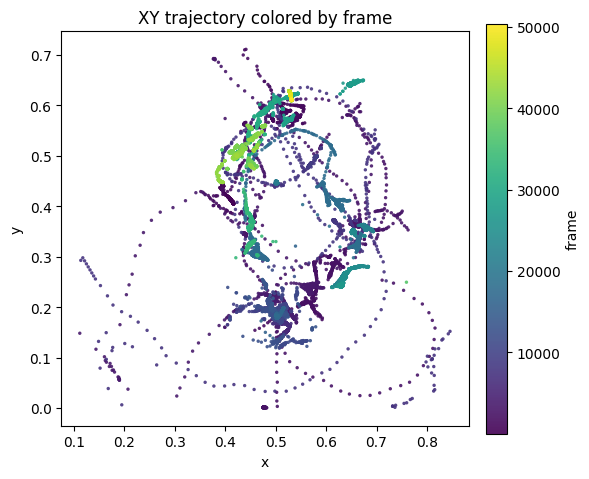

In [7]:
# Plot XY points colored by frame and print metadata
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from IPython.display import display


def print_metadata(df, path: Path):
    print(f"File: {path}")
    print(f"Rows: {len(df)}")
    if 'frame' in df.columns:
        print(f"Frame range: {df['frame'].min()} -> {df['frame'].max()}")
    if 'segment' in df.columns:
        print(f"Unique segments: {df['segment'].nunique()}")
    if 'speed' in df.columns:
        print(f"Speed: min={df['speed'].min():.4g}, max={df['speed'].max():.4g}, mean={df['speed'].mean():.4g}")
    if 'turning_angle' in df.columns:
        print(f"Turning angle: min={df['turning_angle'].min():.4g}, max={df['turning_angle'].max():.4g}")
    if 'x' in df.columns and 'y' in df.columns:
        print(f"X range: {df['x'].min():.6g} -> {df['x'].max():.6g}")
        print(f"Y range: {df['y'].min():.6g} -> {df['y'].max():.6g}")


def plot_xy_colored_by_frame(df, figsize=(6,6), cmap='viridis', s=6):
    if 'x' not in df.columns or 'y' not in df.columns:
        raise ValueError('Dataframe must contain `x` and `y` columns')

    frames = None
    if 'frame' in df.columns:
        frames = pd.to_numeric(df['frame'], errors='coerce')
    else:
        frames = np.arange(len(df))

    x = pd.to_numeric(df['x'], errors='coerce')
    y = pd.to_numeric(df['y'], errors='coerce')

    mask = ~(x.isna() | y.isna())
    x = x[mask]
    y = y[mask]
    frames = frames[mask]

    fig, ax = plt.subplots(figsize=figsize)
    sc = ax.scatter(x, y, c=frames, cmap=cmap, s=s, lw=0, alpha=0.9)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('XY trajectory colored by frame')
    ax.set_aspect('equal', adjustable='box')
    #make colorbar shorter
    cbar = fig.colorbar(sc, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('frame')
    plt.tight_layout()
    plt.savefig(
      'xy_trajectory_colored_by_frame.pdf',
      dpi=200,
      bbox_inches='tight',
      pad_inches=0.02
    )

    plt.show()


# Example: change this path to any preprocessed CSV in your workspace
csv_path = Path('preprocessed_data/full/TERBINAFINE- (control)/coordinates_highestspeed_20240827_10_1_with_time_speed-preprocessed.csv')
if csv_path.exists():
    df = pd.read_csv(csv_path)
    print_metadata(df, csv_path)
    plot_xy_colored_by_frame(df)
else:
    print(f"File not found: {csv_path}. Update `csv_path` variable to point to your CSV.")


# Speed and angle display


--- Line plot summary ---
Speed: num missing=115, min=0
Turning angle: num missing=102, min=-1


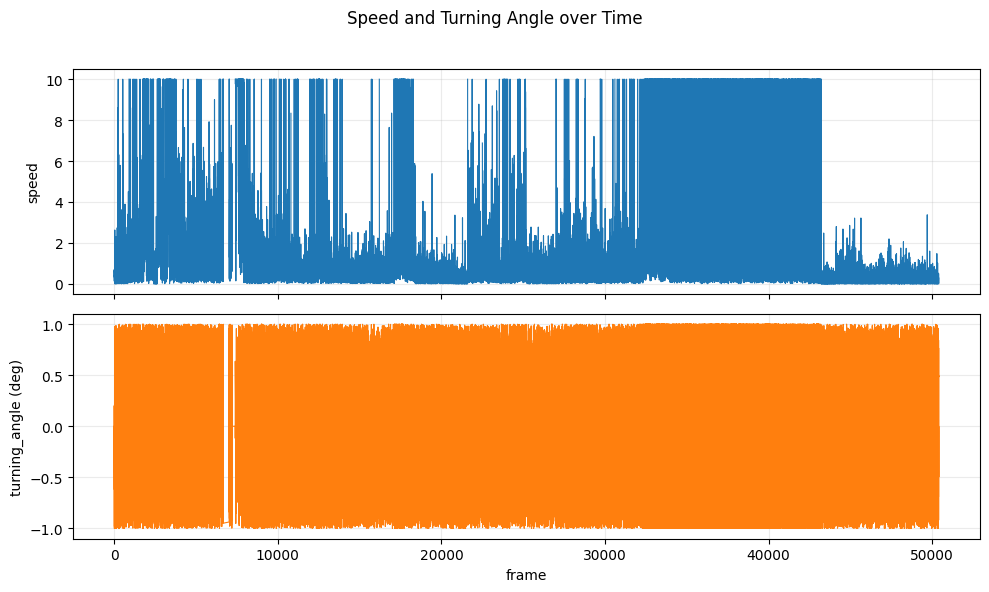

In [5]:
# Line plots for speed and turning angle
import matplotlib.pyplot as plt

def plot_speed_and_angle(df, figsize=(10,6), show=True, save_path=None):
    # x axis: frame if available, otherwise index
    if 'frame' in df.columns:
        x = pd.to_numeric(df['frame'], errors='coerce')
    else:
        x = np.arange(len(df))

    speed = pd.to_numeric(df['speed'], errors='coerce') if 'speed' in df.columns else None
    # prefer 'turning_angle', fallback to 'angle' or 'theta' if present
    if 'turning_angle' in df.columns:
        angle = pd.to_numeric(df['turning_angle'], errors='coerce')
    elif 'angle' in df.columns:
        angle = pd.to_numeric(df['angle'], errors='coerce')
    else:
        angle = None

    if speed is None and angle is None:
        print('No `speed` or `turning_angle` columns found to plot.')
        return

    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=figsize)

    if speed is not None:
        ax1.plot(x, speed, color='tab:blue', lw=0.8)
        ax1.set_ylabel('speed')
        ax1.grid(alpha=0.25)
    else:
        ax1.text(0.5, 0.5, 'No speed data', ha='center', va='center')
        ax1.set_ylabel('speed')

    if angle is not None:
        ax2.plot(x, angle, color='tab:orange', lw=0.8)
        ax2.set_ylabel('turning_angle (deg)')
        ax2.grid(alpha=0.25)
    else:
        ax2.text(0.5, 0.5, 'No turning angle data', ha='center', va='center')
        ax2.set_ylabel('turning_angle')

    ax2.set_xlabel('frame')
    fig.suptitle('Speed and Turning Angle over Time')
    fig.tight_layout(rect=[0, 0, 1, 0.96])

    if save_path:
        fig.savefig(save_path)
        print(f'Saved line plot to: {save_path}')

    if show:
        plt.show()
    else:
        plt.close(fig)


# Run the line plot on the example CSV (edit path if needed)
csv_path = Path('preprocessed_data/full/TERBINAFINE- (control)/coordinates_highestspeed_20240827_10_1_with_time_speed-preprocessed.csv')
if csv_path.exists():
    df = pd.read_csv(csv_path)
    # Print short summary
    print('\n--- Line plot summary ---')
    if 'speed' in df.columns:
        print(f"Speed: num missing={df['speed'].isna().sum()}, min={pd.to_numeric(df['speed'], errors='coerce').min():.4g}")
    if 'turning_angle' in df.columns:
        print(f"Turning angle: num missing={df['turning_angle'].isna().sum()}, min={pd.to_numeric(df['turning_angle'], errors='coerce').min():.4g}")
    plot_speed_and_angle(df)
else:
    print(f"File not found: {csv_path}. Update `csv_path` to a valid preprocessed CSV and re-run this cell.")



--- Line plot summary for first 1000 frames ---
Speed: num missing=2, min=0
Turning angle: num missing=0, min=-1


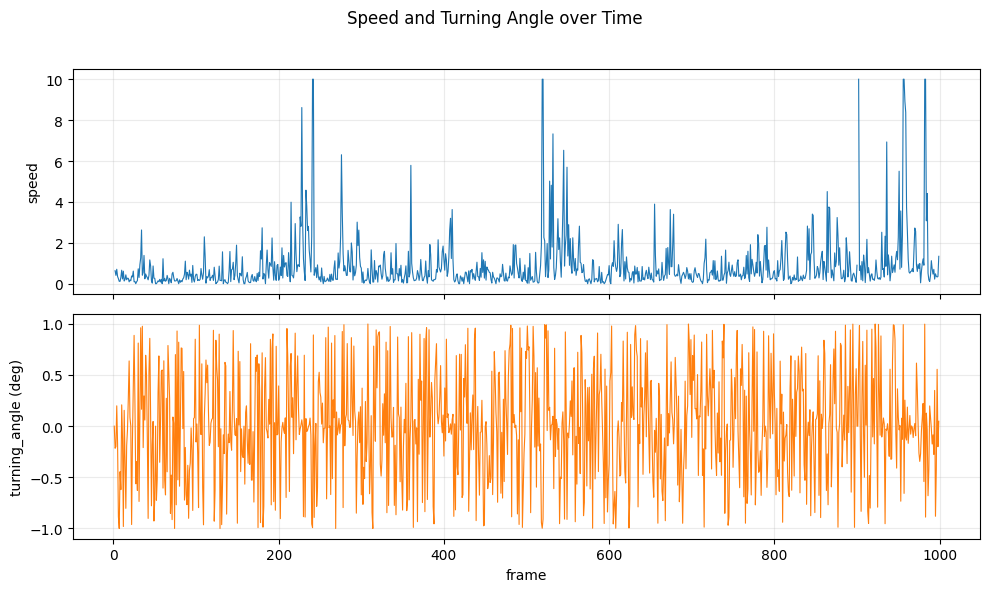

In [6]:
# now for the first 1000 frames only
csv_path = Path('preprocessed_data/full/TERBINAFINE- (control)/coordinates_highestspeed_20240827_10_1_with_time_speed-preprocessed.csv')
if csv_path.exists():
    df = pd.read_csv(csv_path)
    df_1000 = df[df['frame'] < 1000]
    print('\n--- Line plot summary for first 1000 frames ---')
    if 'speed' in df_1000.columns:
        print(f"Speed: num missing={df_1000['speed'].isna().sum()}, min={pd.to_numeric(df_1000['speed'], errors='coerce').min():.4g}")
    if 'turning_angle' in df_1000.columns:
        print(f"Turning angle: num missing={df_1000['turning_angle'].isna().sum()}, min={pd.to_numeric(df_1000['turning_angle'], errors='coerce').min():.4g}")
    plot_speed_and_angle(df_1000)